### Introduction to Logistic Regression model
- Logistic Regression uses binary classification and probablistic approach on outcome. 
- Independent variables should give us classfication of dependent variable (either true or false)
- Independent variables uses fitting parameter to predict the outcome of the model 
- Minimizing cost of the model can be done with Gradient descent method 

In [69]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### About Dataset 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

In [70]:
#Data collection 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"

df = pd.read_csv(url)
df.sample(9)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
32,22.0,34.0,1.0,46.0,3.0,1.0,1.0,0.0,0.0,7.10,...,0.0,1.0,0.0,0.0,0.0,1.960,3.240,3.829,2.0,0.0
189,66.0,50.0,2.0,333.0,5.0,24.0,0.0,1.0,0.0,10.30,...,1.0,1.0,0.0,0.0,0.0,2.332,3.240,5.808,2.0,0.0
88,5.0,32.0,6.0,33.0,4.0,3.0,1.0,0.0,0.0,3.20,...,0.0,1.0,0.0,0.0,1.0,1.163,3.240,3.497,1.0,1.0
16,27.0,51.0,3.0,80.0,5.0,11.0,1.0,0.0,0.0,7.10,...,1.0,1.0,0.0,0.0,1.0,1.960,3.240,4.382,2.0,0.0
130,72.0,75.0,37.0,33.0,1.0,44.0,0.0,1.0,0.0,49.30,...,0.0,0.0,0.0,1.0,0.0,3.898,3.458,3.497,2.0,0.0
184,26.0,55.0,13.0,61.0,1.0,26.0,0.0,1.0,0.0,4.25,...,0.0,0.0,1.0,1.0,0.0,1.447,3.367,4.111,3.0,0.0
162,60.0,56.0,19.0,51.0,4.0,11.0,1.0,1.0,1.0,15.25,...,1.0,1.0,1.0,1.0,1.0,2.725,3.240,3.932,4.0,0.0
24,53.0,22.0,1.0,25.0,4.0,0.0,1.0,1.0,0.0,12.05,...,0.0,1.0,0.0,0.0,1.0,2.489,3.240,3.219,2.0,0.0
37,28.0,29.0,4.0,23.0,3.0,5.0,0.0,0.0,0.0,3.70,...,0.0,1.0,0.0,1.0,1.0,1.308,3.240,3.135,2.0,0.0


In [71]:
#Describe dataset 
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


### Features to be selected for model development 
- **Independent variable**: - Tenure, age, address, income, ed, emplog, equip
- **Dependent variable**: - churn 
- By slecting independent variables, can create a model to predict when a customer will leave services or not

In [72]:
#Feature Selection
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'churn']]
churn_df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000


In [73]:
#Selecting independent & dependent variable from dataframe 
#As dataframes are in floating values, we can only the values 
x = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard']])
y = np.asarray(churn_df['churn'].astype('int'))

In [74]:
#Using Feature pre-process selection method to make variables comparable. 
from sklearn.preprocessing import StandardScaler

#Make independent variables as comparable
x_standard = StandardScaler().fit(x).transform(x).round(2)

In [75]:
#Split dataset into train and test datasets 
#Model should be trained on training datasets 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.2, random_state= 3)

In [76]:
#Model development using Logistic Regression 
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression().fit(x_train, y_train)

print("Slope: - ", regressor.coef_[0])
print("Intercept: - ", regressor.intercept_)

Slope: -  [-0.52995243 -0.47335443  0.16389669 -0.1211524   0.30384676 -0.52148348
  0.51067502 -0.24913657]
Intercept: -  [-1.26805066]


In [77]:
#Testing out model prediction on the test datasets 
y_hat = regressor.predict(x_test)
print(y_hat[:10])

[1 0 0 0 1 0 0 0 0 1]


### Predicting the class in (0, 1) based on the descision threshold 
- Determining probablity of the class with threshold using `sigmoid function` 
- Sigmod Function 
    - p(y_hat) = 1 / 1 + $e^y$
- The step function is defined as $P(yhat) = \begin{cases} 
0 & x < Decision Threshold \\ 
1 & x \geq Decison Threshold 
\end{cases}$.

In [78]:
#Make a propablitistic apprach to determine the class of each testing dataset 
#By Default descision threshold is 0.5
yhat_prob = regressor.predict_proba(x_test)
print(yhat_prob[:10])

[[0.33753381 0.66246619]
 [0.75641758 0.24358242]
 [0.66918991 0.33081009]
 [0.77332372 0.22667628]
 [0.46729341 0.53270659]
 [0.63001441 0.36998559]
 [0.95238562 0.04761438]
 [0.67827077 0.32172923]
 [0.69436296 0.30563704]
 [0.28432888 0.71567112]]


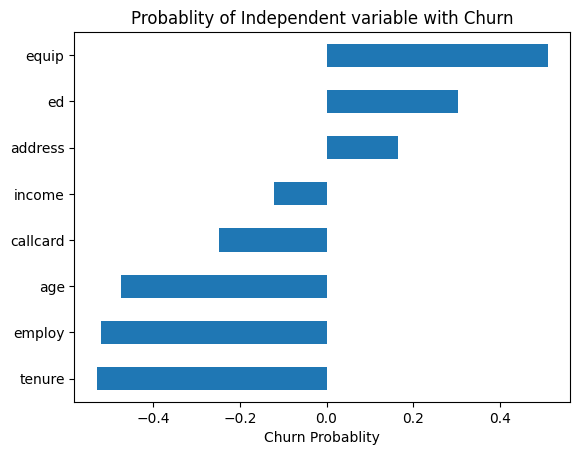

In [79]:
#Visualize the model prediction
#Coeficients that will map weight(slope of each indepdent variable) with column of independent variable
coeficient = pd.Series(regressor.coef_[0], index=churn_df.columns[:-1])
#Sort map of coeficients & plot horizontal graph
coeficient.sort_values().plot(kind= 'barh')
plt.title("Probablity of Independent variable with Churn")
plt.xlabel("Churn Probablity")
plt.show()


In [80]:
#Mode Evaluation using log - loss function 
#Implement log-loss evaluation metrics 
def log_loss(y_hat, yhat_prob):
    n = churn_df['tenure'].size
    return - 1 / n * np.sum( y_hat @ np.log(yhat_prob) + (1 - y_hat) @ np.log(1 - yhat_prob) )

result = log_loss(y_hat, yhat_prob)
print(result)

0.37899511542064696


In [81]:
#Model evaludation using log_loss predefined function 
from sklearn.metrics import log_loss

result = log_loss(y_hat, yhat_prob)
print(result)

0.31728923563142575
